# Chapter 06 - Exercises

### Exercise 6.1

**Q**

If V changes during the episode, then (6.6) only holds approximately; what would the difference be between the two sides? Let $V_t$ denote the array of state values used at time t in the TD error (6.5) and in the TD update (6.2). Redo the derivation above to determine the additional amount that must be added to the sum of TD errors in order to equal the Monte Carlo error.

**A**

The equation 6.2, that defines how the values are updated using the TD method, is:

\begin{align*}
V(S_t) \gets V(S_t) + \alpha [R_{t+1} + \gamma V(S_{t+1}) - V(S_t)] \tag{6.2}
\end{align*}

The TD error (equation 6.5) is:

\begin{align*}
\delta_t \stackrel{.}{=} R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \tag{6.5}
\end{align*}

The equation 6.6 is:

\begin{align*}
G_t - V(S_t) &= R_{t+1} + \gamma G_{t+1} - V(S_t) + \gamma V(S_{t+1}) - \gamma V(S_{t+1}) \tag{from (3.9)} \\
&= \delta_t + \gamma (G_{t+1} - V(S_{t+1})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - V(S_{t+2})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (G_T - V(S_T)) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (0 - 0) \\
&= \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k \tag{6.6}
\end{align*}

If V changes during the episode, then at the start of time t+1 the new V would be (for TD(0)):

\begin{align*}
V_{t+1}(S_t) \gets V_t(S_t) + \alpha [R_{t+1} + \gamma V_t(S_{t+1}) - V_t(S_t)]
\end{align*}

where $V_t$ hold the state values at time t.

The TD error at time t is now:

\begin{align*}
\delta_t \stackrel{.}{=} R_{t+1} + \gamma V_t(S_{t+1}) - V_t(S_t)
\end{align*}

The equation 6.6 considering the initial $V_t$ is:

\begin{align*}
G_t - V_t(S_t) &= R_{t+1} + \gamma G_{t+1} - V_t(S_t) + \gamma V_t(S_{t+1}) - \gamma V_t(S_{t+1})\\
&= \delta_t + \gamma (G_{t+1} - V_t(S_{t+1})) \\
&= \delta_t + \gamma (G_{t+1} - V_t(S_{t+1}) + V_{t+1}(S_{t+1}) - V_{t+1}(S_{t+1})) \\
&= \delta_t + \gamma (G_{t+1} - V_{t+1}(S_{t+1})) + \gamma (V_{t+1}(S_{t+1}) - V_t(S_{t+1})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - V_{t+2}(S_{t+2})) + \gamma^2 (V_{t+2}(S_{t+2}) - V_{t+1}(S_{t+2})) + \gamma (V_{t+1}(S_{t+1}) - V_t(S_{t+1})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (G_T - V_T(S_T)) + \gamma (V_{t+1}(S_{t+1}) - V_t(S_{t+1})) + \gamma^2 (V_{t+2}(S_{t+2}) - V_{t+1}(S_{t+2})) + ... + \gamma^{T-t} (V_T(S_T) - V_{T-1}(S_T)) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (0 - 0) + \gamma (V_{t+1}(S_{t+1}) - V_t(S_{t+1})) + \gamma^2 (V_{t+2}(S_{t+2}) - V_{t+1}(S_{t+2})) + ... + \gamma^{T-t} (V_T(S_T) - V_{T-1}(S_T)) \\
&= \left[ \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k \right] + \left[ \sum_{k=t+1}^{T} \gamma^{k-t} (V_k(S_k) - V_{k-1}(S_k)) \right] \\
&= \left[ \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k \right] + \left[ \sum_{k=t}^{T-1} \gamma^{k-t+1} (V_{k+1}(S_{k+1}) - V_k(S_{k+1})) \right] \\
&= \sum_{k=t}^{T-1} [ \gamma^{k-t} \delta_k + \gamma^{k-t+1} (V_{k+1}(S_{k+1}) - V_k(S_{k+1})) ]
\end{align*}

We have $V_{k+1}(S_{k+1}) = V_k(S_{k+1})$, unless $S_{k+1} = S_k$, in which case there would be a change in the state-value for the state $S_{k+1} = S_k$ in the transition from the time-step k to k+1, and we would have $V_{k+1}(S_{k+1}) = V_{k+1}(S_k)$, because $S_k = S_{k+1}$. The equation $V_{k+1}(S_{k+1}) = V_k(S_{k+1}) + 1_{S_{k+1} = S_k} (V_{k+1}(S_k) - V_k(S_{k+1}))$ corresponds to these 2 cases. So:

\begin{align*}
V_{k+1}(S_{k+1}) &= V_k(S_{k+1}) + 1_{S_{k+1} = S_k} (V_{k+1}(S_k) - V_k(S_{k+1})) \\
&= V_k(S_{k+1}) + 1_{S_{k+1} = S_k} (V_k(S_k) + \alpha [R_{k+1} + \gamma V_k(S_{k+1}) - V_k(S_k)] - V_k(S_{k+1})) \\
&= V_k(S_{k+1}) + 1_{S_{k+1} = S_k} (V_k(S_k) + \alpha [R_{k+1} + \gamma V_k(S_{k+1}) - V_k(S_k)] - V_k(S_k)) \\
&= V_k(S_{k+1}) + 1_{S_{k+1} = S_k} \alpha [R_{k+1} + \gamma V_k(S_{k+1}) - V_k(S_k)] \\
&= V_k(S_{k+1}) + 1_{S_{k+1} = S_k} \alpha \delta_k
\end{align*}

We have:

\begin{align*}
G_t - V_t(S_t) &= \sum_{k=t}^{T-1} [ \gamma^{k-t} \delta_k + \gamma^{k-t+1} (V_{k+1}(S_{k+1}) - V_k(S_{k+1})) ] \\
&= \sum_{k=t}^{T-1} [ \gamma^{k-t} \delta_k + \gamma^{k-t+1} (V_k(S_{k+1}) + 1_{S_{k+1} = S_k} \alpha \delta_k - V_k(S_{k+1})) ] \\
&= \sum_{k=t}^{T-1} [ \gamma^{k-t} \delta_k + 1_{S_{k+1} = S_k} \gamma^{k-t+1} \alpha \delta_k ] \\
&= \sum_{k=t}^{T-1} [ (\gamma^{k-t} + 1_{S_{k+1} = S_k} \gamma^{k-t+1} \alpha) \delta_k ]
\end{align*}

The above equation is the answer of this question. We can also consider the error using the values after the episode ended (after the terminal state $S_T$ is reached).

The final value at the end of the episode, $V_T$, is:

\begin{align*}
V(S_t) = V_T(S_t) &= V_{T-1}(S_t) + 1_{S_{T-1} = S_t} \alpha [R_T + \gamma V_{T-1}(S_T) - V_{T-1}(S_{T-1})] \\
&= V_{T-1}(S_t) + 1_{S_{T-1} = S_t} \alpha \delta_{T-1} \\
&= [V_{T-2}(S_t) + 1_{S_{T-2} = S_t} \alpha \delta_{T-2}] + 1_{S_{T-1} = S_t} \alpha \delta_{T-1} \\
&= V_t(S_t) + \alpha \sum_{k=t}^{T-1} 1_{S_k = S_t} \delta_k
\end{align*}

in which $1_{S_k = S_t}$ means that the value will be 1 if $S_k = S_t$ and 0 otherwise, because $V(S_t)$ changes after the time-step k only if the state at that time-step, $S_k$, is the same state at the time-step t, $S_t$. 

It's important to keep in mind that the same state may be visited several times depending on the choosen actions and the environment dynamics. For the special case in which we have the state $S_t$ only visited at time t, then $V(S_t) = V_t(S_t) + \alpha \delta_t$ (there was only one change: it happened in the transition from t to t+1). In the other extreme, if the state $S_t$ was the only state for all time-steps before the terminal state, then $V(S_t) = V_t(S_t) + \alpha \sum_{k=t}^{T-1} \delta_k$, which is the initial value at time t plus all the changes after each time-step.

The new derivation (6.6) is:

\begin{align*}
G_t - V(S_t) &= G_t - V_t(S_t) - \alpha \sum_{k=t}^{T-1} 1_{S_k = S_t} \delta_k \\
&= \left[ \sum_{k=t}^{T-1} [ \gamma^{k-t} \delta_k + \gamma^{k-t+1} 1_{S_{k+1} = S_k} \alpha \delta_k ] \right] - \alpha \left[ \sum_{k=t}^{T-1} 1_{S_k = S_t} \delta_k \right] \\
&= \sum_{k=t}^{T-1} \left[ \gamma^{k-t} \delta_k + \gamma^{k-t+1} 1_{S_{k+1} = S_k} \alpha \delta_k - 1_{S_k = S_t} \alpha \delta_k \right] \\
&= \sum_{k=t}^{T-1} \left[ (\gamma^{k-t} + \alpha (1_{S_{k+1} = S_k} \gamma^{k-t+1} - 1_{S_k = S_t})) \delta_k \right]
\end{align*}

When $\alpha$ is infinitesimally small, the above error becomes the Monte Carlo error:

\begin{align*}
\operatorname{lim}_{\alpha \to 0} \sum_{k=t}^{T-1} \left[ (\gamma^{k-t} + \alpha (1_{S_{k+1} = S_k} \gamma^{k-t+1} - 1_{S_k = S_t})) \delta_k \right] = \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k
\end{align*}

The above cases were considered for TD(0). For n-step TD, the state-values change only in time-steps multiple of n, so we would have:

\begin{align*}
G_t - V(S_t) = \sum_{k=t}^{T-1} \left[ (\gamma^{k-t} + 1_{(k+1) \equiv 0 \pmod{n}} \alpha (1_{S_{k+1} = S_k} \gamma^{k-t+1} - 1_{S_k = S_t})) \delta_k \right]
\end{align*}

In the case in which $n \gt T$, the condition $(k+1) \equiv 0 \pmod{n}$ would always be false, and the error above would become the Monte Carlo error, which is expected, because Monte Carlo is equivalent to TD(T+1), as there are T+1 time-steps in t = 0, 1, 2, ..., T-1, T.

Actually, the above equation can be generalized to find the error for the state-value $V(S_t)$ after having calculated the values until the time-step $t_{target} > t$, for a n-step TD:

\begin{align*}
G_t - V_{t_{target}}(S_t) = \sum_{k=t}^{t_{target}-1} \left[ (\gamma^{k-t} + 1_{(k+1) \equiv 0 \pmod{n}} \alpha (1_{S_{k+1} = S_k} \gamma^{k-t+1} - 1_{S_k = S_t})) \delta_k \right]
\end{align*}

The above gives the current error for the state-value $V(S_t)$ (with $V_{t_{target}}(S_t)$ probably closer to the true value, $v_{\pi} (S_t)$, than $V_t(S_t)$, because it may have been updated more times after t).

### Exercise 6.2

**Q**

This is an exercise to help develop your intuition about why TD methods are often more efficient than Monte Carlo methods. Consider the driving home example and how it is addressed by TD and Monte Carlo methods. Can you imagine a scenario in which a TD update would be better on average than a Monte Carlo update? Give an example scenario—a description of past experience and a current state—in which you would expect the TD update to be better. Here’s a hint: Suppose you have lots of experience driving home from work. Then you move to a new building and a new parking lot (but you still enter the highway at the same place). Now you are starting to learn predictions for the new building. Can you see why TD updates are likely to be much better, at least initially, in this case? Might the same sort of thing happen in the original scenario?

**A**

One important advantage of TD over Monte Carlo is that TD adjusts itself during the episode. If in the given example each situation (leaving office, reach car, etc...) along with the elapsed time is considered to be a state, and the transitions between them as the single possible action, with the next state deterministic and the reward (the elapsed time for the step) depending on the environment dynamics, then the Monte Carlo method can be seen as an average over all the randomness in all possible steps, while TD adjusts for the randomness in each step (for TD(0)).

The graphs show the total elapsed time, but policy evaluation for Monte Carlo and TD define the expected rewards (state values or state-action values) for the states, from that state onwards (not from the initial state). For $\gamma = 1$ and $\alpha = 1$, The Monte Carlo would change the expected reward of the state "exiting the highway" from 15 to 23, while TD(0) would change from 15 to 20 ($R + \gamma G_{next} = 10 + 1 \cdot 10 = 20$, with $G_{next}$ the expected reward of the next state, which is the remaining expected time when reaching the state "2ndary road", which in this case, because there's a single action in each state, corresponds to $V_{next}$).

In the proposed case, when moving to a new building and a new parking lot, that trajectory would initially give wrong times (predicted rewards), which would affect the expected reward for the entire episode in the case of Monte Carlo, but TD mainly adjust for the new subpaths, while the known subpaths should give the same expected reward. This means that Monte Carlo expected reward should have a higher variance initially because the new subpath will end up affecting the entire expected reward, while TD would be more precise adjusting mainly the subpaths expected rewards (which will affect the total expected reward, but as a consequence). After lots episodes, the new subpaths will have the average expected reward and will be the same for Monte Carlo and TD. An interesting point is that if there's a need to change the environment to use the proposed scenario, then the values from TD could be bootstrapped to be used for the existing states (the new states should be defined arbitrarily), giving a faster convergence to the expected values.

This also happen in the original scenario, but the error should reduce in both cases after a large amount of episodes. Considering that it's a real scenario with a huge amount of possible rewards (it has a high entropy due to rain, traffic, and a lot of other situations that can happen), TD should converge faster to more precise rewards because it can adapt better for each step, instead of just having a global view. There should be exceptions to this, especially in scenarios in which a change in the reward of a state affect the reward of another, like choosing a different highway that takes a bit more time, but ends at the end of the secondary road, reducing the total time (this wouldn't be an MDP environment tough; to turn it in an MDP the states should be divided in more states to preserve the MDP property; in this case, removing the state "2ndary road" and adding the states "2ndary road - part 1" and "2ndary road - part 2" that corresponds the parts of the secondary road before and after the intersection with the new highway, respectively, should turn it back into an MDP).

It's important to note that TD only adjusts the expected reward (value) for the previous state (after transitioning from $S_1$ to $S_2$ due to action $A_1$ and receiving the reward $R_2$, it will update the state value V($S_1$), or the state-action value Q($S_1$, $A_1$)). In the proposed scenario, the states do not repeat in an episode, so the changes will only benefit the next episode, even for TD(0).

### Exercise 6.3

**Q**

From the results shown in the left graph of the random walk example it appears that the first episode results in a change in only V(A). What does this tell you about what happened on the first episode? Why was only the estimate for this one state changed? By exactly how much was it changed?

**A**

The first episoded ended in the terminal state that returns a reward of 0 (the left terminal state). 

Initially, all states have the same state value (0.5), and because all the rewards are 0, there was no change in the state-value before the terminal state (because the task is undiscounted, that is, $\gamma = 1$):

\begin{align*}
V(S_t) \gets V(S_t) + \alpha [R_{t+1} + \gamma V(S_{t+1}) - V(S_t)] = 0.5 + \alpha [0 + 1 \cdot 0.5 - 0.5] = 0.5 + \alpha \cdot 0 = 0.5
\end{align*}

The only exception is for the last time-step in the episode, because $V(S_T) = 0$, and the reward received going from A to the terminal state at the left ($R_{T_{left}}$) is 0:

\begin{align*}
V(A) \gets V(A) + \alpha [R_{T_{left}} + \gamma V(S_T) - V(A)] = V(A) + \alpha \cdot [0 + 1 \cdot 0 - V(A)] = V(A) - \alpha V(A) = (1 - \alpha) V(A)
\end{align*}

The case shown in the left graph used $\alpha = 0.1$, so:

\begin{align*}
V(A) \gets (1 - \alpha) V(A) = (1 - 0.1) \cdot 0.5 = 0.9 \cdot 0.5 = 0.45
\end{align*}

The state-value of A decreased by 0.05 (from 0.5 to 0.45).

### Exercise 6.4

**Q**

The specific results shown in the right graph of the random walk example are dependent on the value of the step-size parameter, $\alpha$. Do you think the conclusions
about which algorithm is better would be affected if a wider range of $\alpha$ values were used? Is there a different, fixed value of $\alpha$ at which either algorithm would have performed significantly better than shown? Why or why not?

**A**

If a wider range of $\alpha$ values were used, the TD algorithm should still have better results, on average. 

The general rule is that the lesser the value of $\alpha$, the smaller the error will be after a lot of episodes, with less variance between episodes (similar to how derivation finds the direction of a curve after an infinitesimal distance, with greater error the larger the distance considered is). 

Although very small values of $\alpha$ end up with less variance, they take longer start giving better values (which can be seen for the cases of $\alpha = 0.05$ for TD and $\alpha = 0.01$ for MC). On the other hand, large values of $\alpha$ will change faster, but with greater variance, ending up worse than the cases shown for smaller $\alpha$ after a sufficient amount of episodes (like $\alpha = 0.15$ for TD and $\alpha = 0.04$ for MC).

Smaller values of $\alpha$ should give better results after a large amount of episodes, but for the 100 episodes of the proposed scenario, the algorithm would not have performed significantly better than shown (it could end up being worse because it would take too long to give good results, giving a worse result after 100 episodes than a larger $\alpha$).

### Exercise 6.5

**Q**

In the right graph of the random walk example, the RMS error of the TD method seems to go down and then up again, particularly at high $\alpha$’s. What could have caused this? Do you think this always occurs, or might it be a function of how the approximate value function was initialized?

**A**

As the predicted state-values approach the true state-values, the changes to the values will have more impact in the error, causing the error to increase sometimes, although it might decrease again after more episodes. Smaller values of $\alpha$ decrease this variance, with an infinitesimally small $\alpha$ giving a smooth graph (see the previous exercise). This situation should generally occur, epecially at high $\alpha$’s.

### Exercise 6.6

**Q**

In Example 6.2 we stated that the true values for the random walk example are $\frac{1}{6}$, $\frac{2}{6}$, $\frac{3}{6}$, $\frac{4}{6}$ and $\frac{5}{6}$, for states A through E. Describe at least two different ways that these could have been computed. Which would you guess we actually used? Why?

**A**

One and more general way to solve it is to solve the system of equations for every state value ($\gamma = 1$ because the task is undiscounted):

\begin{align*}
V(s) = \mathbb{E} [R_{t+1} + \gamma V(S_{t+1}), S_t=s] = \mathbb{E} [R_{t+1} + V(S_{t+1}), S_t=s] = 0.5 \cdot [R_{t_{left}} + V(S_{t_{left}})] + 0.5 \cdot [R_{t_{right}} + V(S_{t_{right}})]
\end{align*}

Each state has 50% chance of going either left or right, so each case is multiplied (weighted) by 0.5.

For all states A through E:

\begin{align*}
V(A) &= 0.5 \cdot [R_{T_{left}} + V(S_{T_{left}})] + 0.5 \cdot [R_B + V(B)] = 0.5 \cdot [0 + 0] + 0.5 \cdot [0 + V(B)] = 0.5 \cdot V(B) \\
V(B) &= 0.5 \cdot [R_A + V(A)] + 0.5 \cdot [R_C + V(C)] = 0.5 \cdot [0 + V(A)] + 0.5 \cdot [0 + V(C)] = 0.5 \cdot [V(A) + V(C)] \\
V(C) &= 0.5 \cdot [R_B + V(B)] + 0.5 \cdot [R_D + V(D)] = 0.5 \cdot [0 + V(B)] + 0.5 \cdot [0 + V(D)] = 0.5 \cdot [V(B) + V(D)] \\
V(D) &= 0.5 \cdot [R_C + V(C)] + 0.5 \cdot [R_E + V(E)] = 0.5 \cdot [0 + V(C)] + 0.5 \cdot [0 + V(E)] = 0.5 \cdot [V(C) + V(E)] \\
V(E) &= 0.5 \cdot [R_D + V(D)] + 0.5 \cdot [R_{T_{right}} + V(S_{T_{right}})] = 0.5 \cdot [0 + V(D)] + 0.5 \cdot [1 + 0] = 0.5 \cdot V(D) + 0.5
\end{align*}

V(B) in terms of V(A):

\begin{align*}
V(A) &= 0.5 \cdot V(B) \\
V(B) &= 2 \cdot V(A)
\end{align*}

V(C) in terms of V(A):

\begin{align*}
V(B) &= 0.5 \cdot [V(A) + V(C)] \\
2 \cdot V(A) &= 0.5 \cdot V(A) + 0.5 \cdot V(C) \\
1.5 \cdot V(A) &= 0.5 \cdot V(C) \\
V(C) &= 3 \cdot V(A) \\
\end{align*}

V(D) in terms of V(A):

\begin{align*}
V(C) &= 0.5 \cdot [V(B) + V(D)] \\
3 \cdot V(A) V(B) &= 0.5 (2 \cdot V(A)) + 0.5 \cdot V(D) \\
3 \cdot V(A) V(B) &= V(A) + 0.5 \cdot V(D) \\
2 \cdot V(A) V(B) &= 0.5 \cdot V(D) \\
V(D) &= 4 \cdot V(A)
\end{align*}

V(E) in terms of V(A):

\begin{align*}
V(D) &= 0.5 \cdot [V(C) + V(E)] \\
4 \cdot V(A) &= 0.5 (3 \cdot V(A)) + 0.5 \cdot V(E) \\
8 \cdot V(A) &= 3 \cdot V(A) + V(E) \\
V(E) &= 5 \cdot V(A)
\end{align*}

Solving for V(A):

\begin{align*}
V(E) &= 0.5 \cdot V(D) + 0.5 \\
2 \cdot V(E) &= V(D) + 1 \\
10 \cdot V(A) &= 4 \cdot V(A) + 1 \\
6 \cdot V(A) &= 1 \\
V(A) &= \frac{1}{6}
\end{align*}

Solving for V(B), V(C), V(D) and V(E):

\begin{align*}
V(B) &= 2 \cdot V(A) = 2 \cdot \frac{1}{6} = \frac{2}{6} \\
V(C) &= 3 \cdot V(A) = 3 \cdot \frac{1}{6} = \frac{3}{6} \\
V(D) &= 4 \cdot V(A) = 4 \cdot \frac{1}{6} = \frac{4}{6} \\
V(E) &= 5 \cdot V(A) = 5 \cdot \frac{1}{6} = \frac{5}{6}
\end{align*}

Due to the symmetry of the environment, the reward of going to the leftmost terminal state being 0 and the rightmost 1, with all other rewards 0, and being undiscounted, with an odd number of states with equally random chances of going left or right, the state at the center, C, could already be considered having a return of 0.5, so $V(C) = 0.5$, and then the values of the other states could be found faster.

Actually, due to the symmetry, a convenient way to define the returns (and state-values), is to attribute weights from the leftmost state (terminal) to the rightmost (terminal), from 0 to 6 ($weight_{left} = 0$, $weight_A = 1$, ..., $weight_E = 5$, $weight_{right} = 6$, that is, 7 weights for 7 states, with 5 inner weights corresponding to the non-terminal states, the worst/leftmost state with minimum weight and the best/rightmost state with maximum weight), and divide by the maximum weight (6) to define the values of the states, $V(left) = \frac{0}{6} = 0$, $V(A) = \frac{1}{6}$, ..., $V(E) = \frac{5}{6}$, $V(right) = \frac{6}{6} = 1$, and then ignore the first and last states (terminal states have value 0; they were given other values just for the sake of continuity, with weights to define a continuous sequence from 0 to 1). This is probably the way that the values were computed due to its simplicity.

### Exercise 6.7

**Q**

Design an off-policy version of the TD(0) update that can be used with arbitrary target policy $\pi$ and covering behavior policy b, using at each step t the importance sampling ratio $\rho_{t:t}$ (5.3).

**A**

The equation 5.3 is:

\begin{align*}
\rho_{t:T-1} \stackrel{.}{=} \frac{\prod_{k=t}^{T-1} \pi(A_k | S_k) p(S_{k+1} | S_k, A_k)}{\prod_{k=t}^{T-1} b(A_k | S_k) p(S_{k+1} | S_k, A_k)} = \prod_{k=t}^{T-1} \frac{\pi(A_k | S_k)}{b(A_k | S_k)}
\end{align*}

For TD(0), the policy evaluation is done after each time-step, so it's only considered the transition from the current to the next state:

\begin{align*}
\rho_{t:t} \stackrel{.}{=} \prod_{k=t}^{t} \frac{\pi(A_k | S_k)}{b(A_k | S_k)} = \frac{\pi(A_t | S_t)}{b(A_t | S_t)}
\end{align*}

which is the relation of the probabilities of choosing the action $A_t$ in the state $S_t$ under the target policy $\pi$ compared to the probability of choosing it under the behavior policy $b$. For the cases in which the policy $\pi$ has no probability of choosing that action, $\rho = 0$, so these cases will not be used during the target policy improvement (the probability of $b$ choosing that action is always higher than 0, because it was the actual policy used during the evaluation, which means that the action $A_t$ was choosen by $b$ at the time-step t).

The algorithm for off-policy TD(0) control is:

> Input: an arbitrary target policy $\pi$, discount factor $\gamma$ and step-size parameter $\alpha > 0$
>
> Initialize, for all $s \in \mathcal{S}$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$V(s) \in \mathbb{R}$ (arbitrarily)<br/>
>
>Loop forever (for each episode):<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$b \gets$ any policy with coverage of $\pi$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;For each time-step t in the episode, with $S_t$, $A_t$, $R_{t+1}$ and $S_{t+1}$ being the state, action, reward and next state, respectively:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$W \gets \frac{\pi(A_t | S_t)}{b(A_t | S_t)}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V(S_t) \gets V(S_t) + W \cdot \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$<br/>

The above algorithm can be resumed in the following update at each time-step t:

\begin{align*}
V(S_t) \gets V(S_t) + \rho_{t:t} \cdot \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]
\end{align*}

Note that the state-value is not updated when $\pi(A_t | S_t) = 0$, because $\rho_{t:t} = 0$ (the value should not be updated for the cases in which the action $A_t$ can not be choosen by the target policy $\pi$ in the state $S_t$), and for the cases in which both policies have the same probability of choosing $A_t$ given $S_t$, then the update is the same as the update that would be done in an on-policy update over $\pi$.

### Exercise 6.8 

**Q**

Show that an action-value version of (6.6) holds for the action-value form of the TD error $\delta_t = R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)$, again assuming that the values don’t change from step to step.

**A**

Equation 6.6 is:

\begin{align*}
G_t - V(S_t) &= R_{t+1} + \gamma G_{t+1} - V(S_t) + \gamma V(S_{t+1}) - \gamma V(S_{t+1}) \\
&= \delta_t + \gamma (G_{t+1} - V(S_{t+1})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - V(S_{t+2})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (G_T - V(S_T)) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (0 - 0) \\
&= \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k
\end{align*}

The action-value version of it is:

\begin{align*}
G_t - Q(S_t, A_t) &= R_{t+1} + \gamma G_{t+1} - Q(S_t, A_t) + \gamma Q(S_{t+1}, A_{t+1}) - \gamma Q(S_{t+1}, A_{t+1}) \\
&= \delta_t + \gamma (G_{t+1} - Q(S_{t+1}, A_{t+1})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - Q(S_{t+2}, A_{t+2})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (G_T - Q(S_T, A_T)) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (0 - 0) \\
&= \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k
\end{align*}

### Exercise 6.9

**Q**

Windy Gridworld with King’s Moves (programming) Re-solve the windy gridworld assuming eight possible actions, including the diagonal moves, rather than the usual four. How much better can you do with the extra actions? Can you do even better by including a ninth action that causes no movement at all other than that caused by the wind?

**A**

In [1]:
import typing
import numpy as np
from numpy.random import MT19937, Generator

S = typing.TypeVar('S')
A = typing.TypeVar('A')

def random_generator(seed: int | None = None):
    bg = MT19937(seed)
    rg = Generator(bg)
    return rg

class BaseEnv(typing.Generic[S, A]):
    def __init__(
        self,
        states: list[S],
        actions: list[A],
        terminal_states: list[int],
    ):
        num_states = len(states)
        num_actions = len(actions)

        assert num_states > 0
        assert num_actions > 0

        self.states = states
        self.actions = actions
        self.num_states = num_states
        self.num_actions = num_actions
        self.terminal_states = terminal_states

    def reset(self, seed: int | None) -> S:
        raise NotImplementedError()

    def step(self, action: A) -> tuple[S, float, bool, bool]:
        raise NotImplementedError()

class AgentData:
    def __init__(
        self,
        policy: list[list[float]],
        q: list[float],
    ):
        self.policy = policy
        self.q = q

class TrainResult:
    def __init__(
        self,
        steps: list[int],
        returns: list[float],
    ):
        self.steps = steps
        self.returns = returns
        self.greedy_steps: int | None = None
        self.greedy_returns: float | None = None

class BaseAgent(typing.Generic[S, A]):

    def action(self, state: S) -> A:
        raise NotImplementedError()

    def train(self, episodes: int) -> TrainResult:
        raise NotImplementedError()

    def reset(self):
        raise NotImplementedError()

class TDAgentOnPolicy(BaseAgent[S, A], typing.Generic[S, A]):
    def __init__(
        self,
        env: BaseEnv[S, A],
        alpha: float = 0.5,
        gamma: float = 1.0,
        epsilon: float = 0.1,
        seed: int | None = None,
    ):
        assert alpha > 0
        assert alpha <= 1
        assert gamma >= 0
        assert gamma <= 1
        assert epsilon > 0
        assert epsilon <= 1

        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

        num_states = env.num_states
        num_actions = env.num_actions

        other_prob = epsilon/num_actions
        main_prob = 1.0 - epsilon + other_prob

        q: list[list[float]] = [[0.0 for _ in range(num_actions)] for _ in range(num_states)]

        self.main_prob = main_prob
        self.other_prob = other_prob
        self.initial_q = q
        self.q = q
        self.rg = random_generator(seed)

    def get_probs(self, s: int) -> list[float]:
        main_prob = self.main_prob
        other_prob = self.other_prob
        qs = self.q[s]

        best_a = np.argmax(qs)
        probs = [main_prob if a == best_a else other_prob for a in range(len(qs))]

        return probs

    def action(self, state: S, greedy=False) -> A:
        env = self.env

        s = env.states.index(state)
        probs = self.get_probs(s)
        a = np.argmax(probs) if greedy else self.rg.choice(len(probs), p=probs)
        action = env.actions[a]

        return action

    def run_episode(self, greedy: bool, seed: int | None) -> TrainResult:
        env = self.env
        q = self.q
        alpha = self.alpha
        gamma = self.gamma
        state = env.reset(seed)
        action = self.action(state, greedy=greedy)
        done = False
        steps = 0
        ret: float = 0.0

        while not done:
            next_state, reward, terminated, truncated = env.step(action)
            steps += 1
            ret += reward
            next_action = self.action(next_state, greedy=greedy)
            s = env.states.index(state)
            a = env.actions.index(action)
            ns = env.states.index(next_state)
            na = env.actions.index(next_action)

            if not greedy:
                q[s][a] += alpha * (reward + gamma * q[ns][na] - q[s][a])

            state = next_state
            action = next_action
            done = terminated or truncated

        return steps, ret

    def train(self, episodes: int, seed: int | None = None, run_greedy=True, print_results=True) -> TrainResult:
        print_every = max((episodes // 10), 1)
        result = TrainResult(steps=[], returns=[])

        for i_episode in range(episodes):
            episode_num = i_episode + 1

            steps, ret = self.run_episode(greedy=False, seed=seed)

            result.steps.append(steps)
            result.returns.append(ret)

            if print_results and ((episode_num % print_every == 0) or (episode_num == episodes)):
                print(f'Episode #{episode_num}: steps={steps} return={ret:.0f}')

        if run_greedy:
            steps, ret = self.run_episode(greedy=True, seed=seed)
            self.greedy_steps = steps
            self.greedy_returns = ret

            if print_results:
                print(f'Greedy Policy: steps={steps} return={ret:.0f}')

        return result

    def reset(self) -> AgentData:
        q = self.initial_q
        self.initial_q = q
        self.q = q

class WindGridEnvBase(BaseEnv[tuple[int, int], tuple[int, int]]):
    def __init__(
        self,
        actions: list[tuple[int, int]],
        stochastic=False,
        max_steps=100,
    ):
        num_x = 10
        num_y = 7
        winds = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        initial_state = (0, 3)
        final_state = (7, 3)
        states = [(x, y) for y in range(num_y) for x in range(num_x)]
        terminal_states = [states.index(final_state)]

        super().__init__(states=states, actions=actions, terminal_states=terminal_states)

        self.stochastic = stochastic
        self.max_steps = max_steps
        self.initial_state = initial_state
        self.final_state = final_state
        self.num_x = num_x
        self.num_y = num_y
        self.winds = winds

        self.steps = 0
        self.rg = random_generator(None)
        self.state: tuple[int, int] | None = None

    def reset(self, seed: int | None) -> S:
        self.steps = 0
        self.state = self.initial_state
        if seed is not None:
            self.rg = random_generator(seed)
        return self.state

    def normalize_state(self, state: tuple[int, int]) -> tuple[S, float, bool, bool]:
        num_x = self.num_x
        num_y = self.num_y

        s_x, s_y = state

        x = max(min(s_x, num_x-1), 0)
        y = max(min(s_y, num_y-1), 0)

        return (x, y)

    def apply_move(self, state: tuple[int, int], move: tuple[int, int]) -> tuple[int, int]:
        tmp_state = (state[0] + move[0], state[1] + move[1])
        return self.normalize_state(tmp_state)

    def step(self, action: A) -> tuple[S, float, bool, bool]:
        stochastic = self.stochastic
        max_steps = self.max_steps
        final_state = self.final_state
        winds = self.winds
        steps = self.steps
        state = self.state
        rg = self.rg

        assert state is not None
        assert state != final_state
        assert steps < max_steps

        steps += 1

        tmp_state = self.apply_move(state, action)
        wind = winds[state[0]]
        wind += 0 if not stochastic else rg.choice([-1, 0, 1])
        next_state = self.apply_move(tmp_state, (0, wind))

        reward = -1
        terminated = next_state == final_state
        truncated = (not terminated) and (steps >= max_steps)

        self.steps = steps
        self.state = next_state

        return next_state, reward, terminated, truncated

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(env: WindGridEnvBase, agent: TDAgentOnPolicy, result: TrainResult):
    steps = result.steps
    q = agent.q
    num_x = env.num_x
    num_y = env.num_y
    winds = env.winds

    cumsteps = [0]
    sum_steps = 0

    for ep_steps in steps:
        sum_steps += ep_steps
        cumsteps += [sum_steps]

    plt.figure()
    plt.xlabel('Time steps')
    plt.ylabel('Episodes')
    plt.plot(cumsteps, range(len(cumsteps)))

    plt.figure()
    plt.xlabel('Episodes')
    plt.ylabel('Time steps (Episode)')
    plt.plot(range(len(steps) + 1), [0] + steps)

    plt.figure()
    plt.xlabel('Last 100 episodes')
    plt.ylabel('Time steps (Episode)')
    plt.plot(range(len(steps) - len(steps[-100:]) + 1, len(steps) + 1), steps[-100:])

    def idx(x: int, y: int) -> int:
        return (num_y - y - 1) * num_x + x

    v = [max(qs) for qs in q]
    v_table = [[v[idx(x, y)] for x in range(num_x)] for y in range(num_y)]
    annot = [[
        f'{v[idx(x, y)]:.1f}\n({x}, {num_y - y - 1})\n{env.actions[np.argmax(q[idx(x, y)])]}'
        for x in range(num_x)] for y in range(num_y)
    ]

    plt.figure(figsize=(20, 16))
    sns.heatmap(
        v_table,
        fmt='',
        cmap='viridis',
        annot=annot,
        xticklabels=winds,
        yticklabels=[])
    plt.title('Values')
    plt.show()

Episode #100: steps=18 return=-18
Episode #200: steps=17 return=-17
Episode #300: steps=24 return=-24
Episode #400: steps=25 return=-25
Episode #500: steps=17 return=-17
Episode #600: steps=19 return=-19
Episode #700: steps=17 return=-17
Episode #800: steps=21 return=-21
Episode #900: steps=17 return=-17
Episode #1000: steps=15 return=-15
Greedy Policy: steps=15 return=-15
Time Steps: 24676


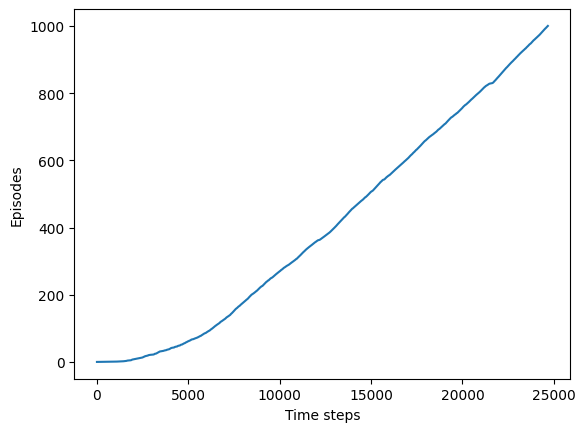

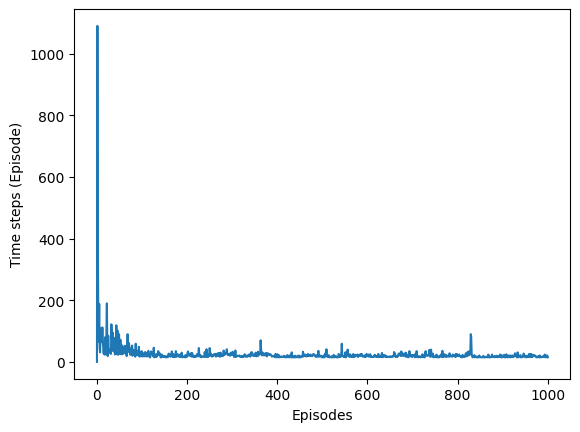

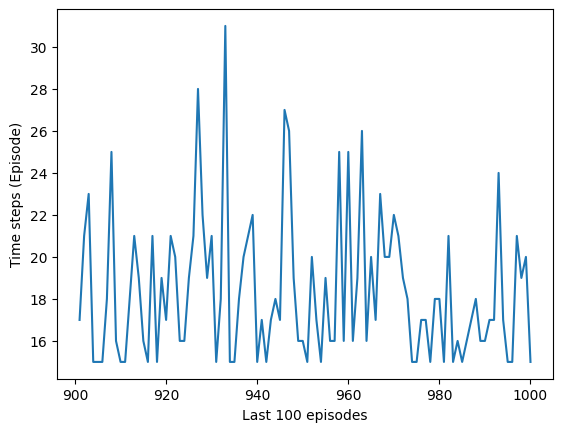

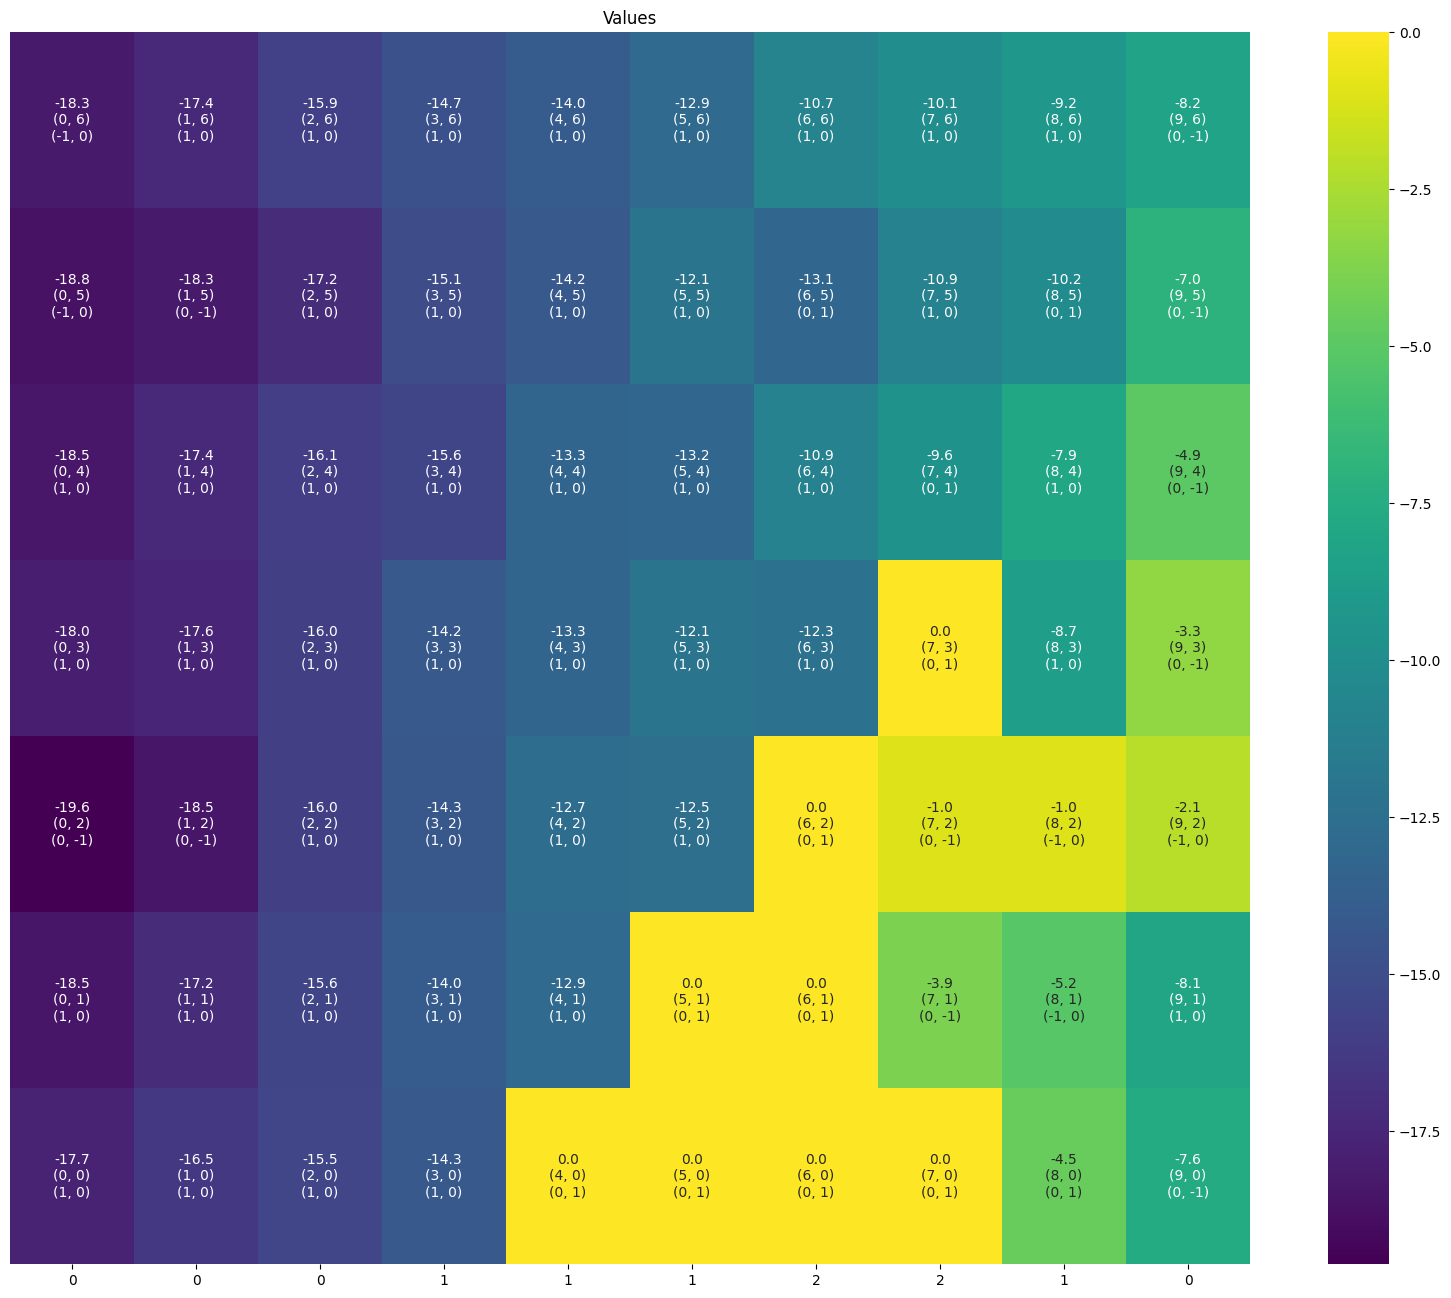

In [3]:
# Original Env
seed = 4
env = WindGridEnvBase(
    actions=[(0, 1), (1, 0), (0, -1), (-1, 0)],
    stochastic=False,
    max_steps=2000)
agent = TDAgentOnPolicy(env=env, seed=seed)
result = agent.train(episodes=1000, seed=seed)
print(f'Time Steps: {sum(result.steps)}')
plot(env=env, agent=agent, result=result)

Episode #100: steps=15 return=-15
Episode #200: steps=8 return=-8
Episode #300: steps=20 return=-20
Episode #400: steps=20 return=-20
Episode #500: steps=7 return=-7
Episode #600: steps=10 return=-10
Episode #700: steps=7 return=-7
Episode #800: steps=11 return=-11
Episode #900: steps=10 return=-10
Episode #1000: steps=9 return=-9
Greedy Policy: steps=7 return=-7
Time Steps: 16501


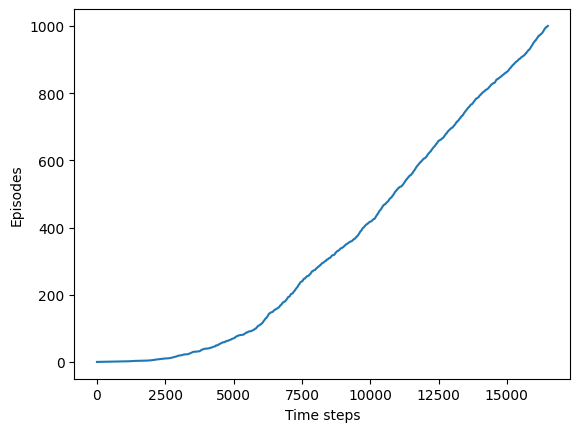

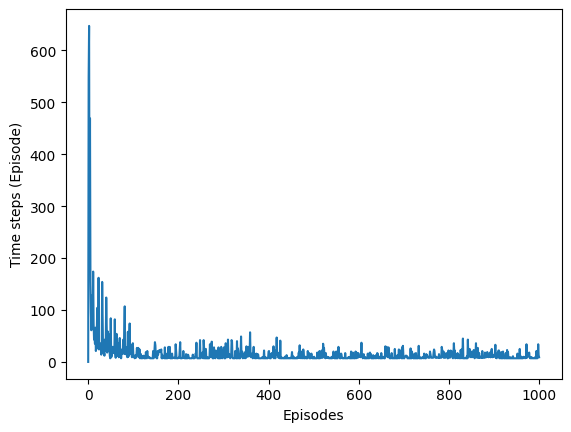

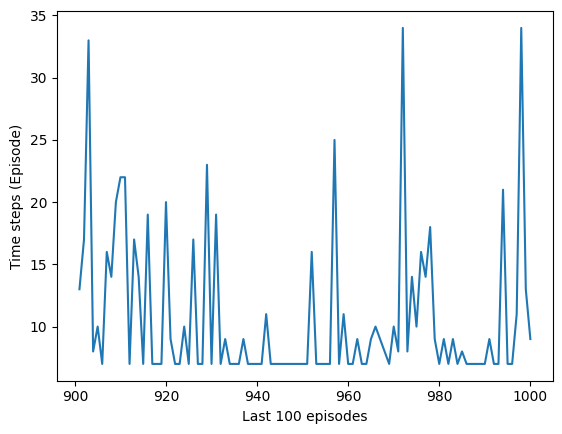

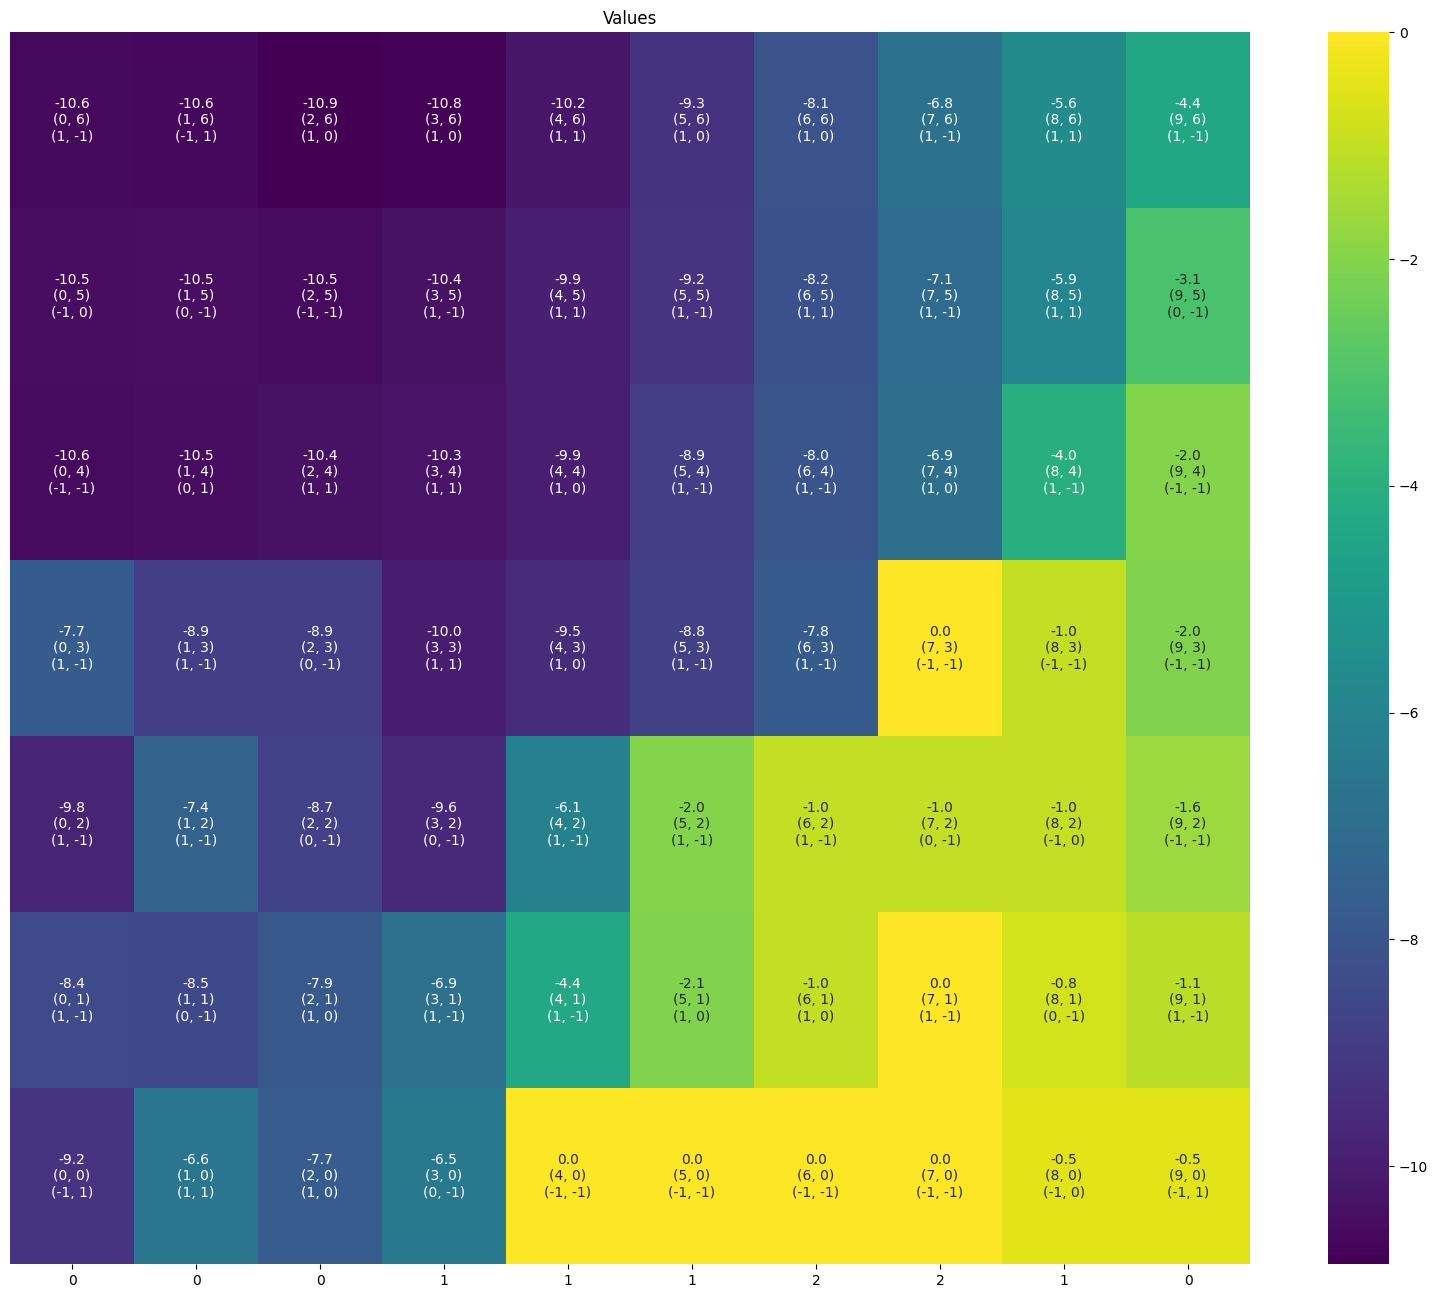

In [4]:
# Answer (8 actions)
seed = 4
env = WindGridEnvBase(
    actions=[item for item in [(x, y) for x in [-1, 0, 1]  for y in [-1, 0, 1]] if item != (0, 0)],
    stochastic=False,
    max_steps=2000)
agent = TDAgentOnPolicy(env=env, seed=seed)
result = agent.train(episodes=1000, seed=seed)
print(f'Time Steps: {sum(result.steps)}')
plot(env=env, agent=agent, result=result)

Episode #500: steps=9 return=-9
Episode #1000: steps=8 return=-8
Episode #1500: steps=10 return=-10
Episode #2000: steps=15 return=-15
Episode #2500: steps=13 return=-13
Episode #3000: steps=7 return=-7
Episode #3500: steps=20 return=-20
Episode #4000: steps=8 return=-8
Episode #4500: steps=8 return=-8
Episode #5000: steps=10 return=-10
Greedy Policy: steps=7 return=-7
Time Steps: 62459


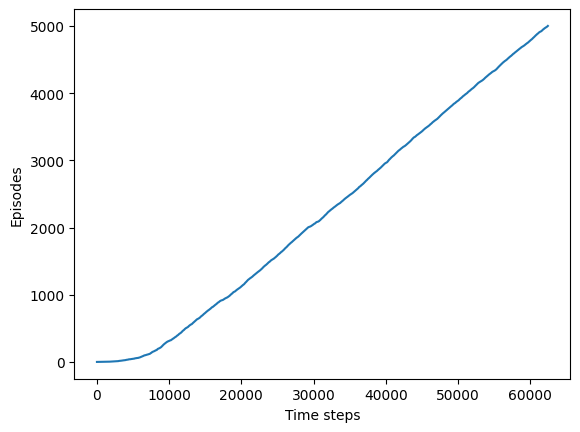

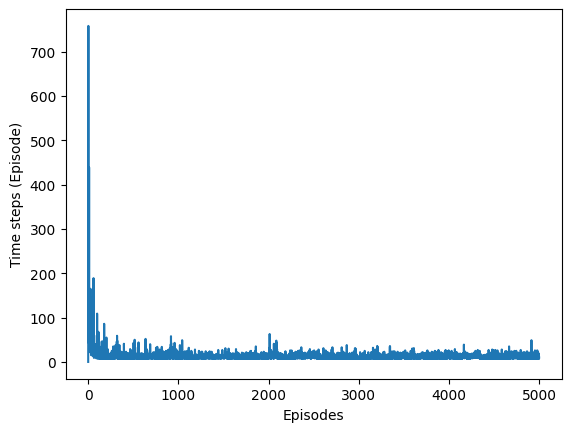

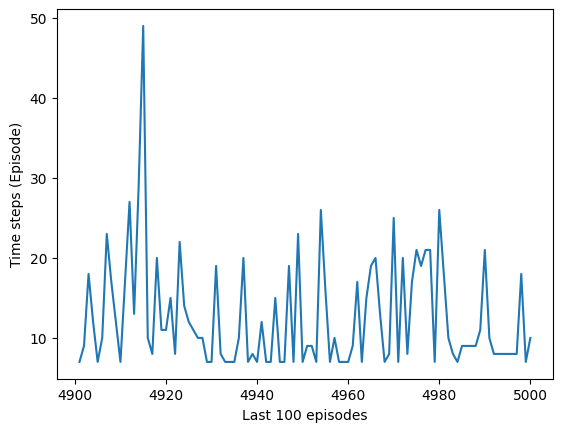

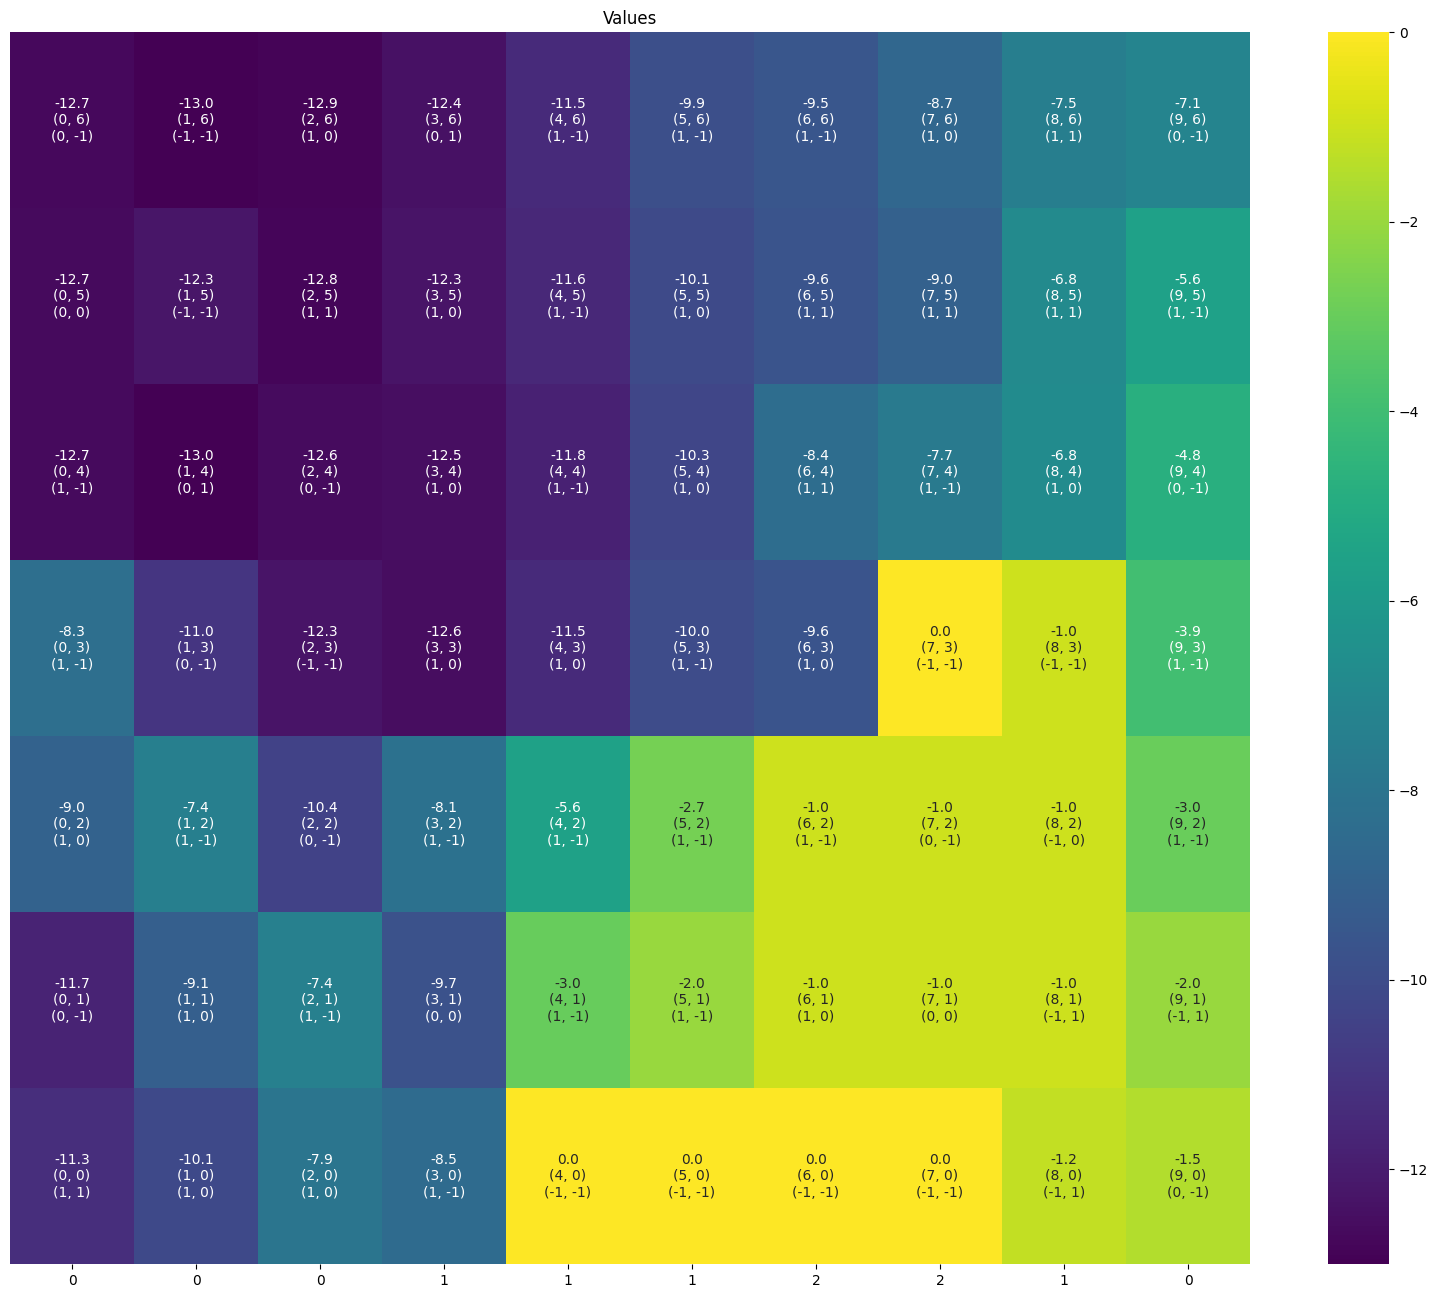

In [5]:
# Answer (9 actions)
seed = 6
env = WindGridEnvBase(
    actions=[(x, y) for x in [-1, 0, 1]  for y in [-1, 0, 1]],
    stochastic=False,
    max_steps=2000)
agent = TDAgentOnPolicy(env=env, seed=seed)
result = agent.train(episodes=5000, seed=seed)
print(f'Time Steps: {sum(result.steps)}')
plot(env=env, agent=agent, result=result)

The ninth action caused no difference in the results, which is expected, considering that it does nothing and decreases the reward due to the time-step spent; one exception would be the state exactly 2 cells below the result, which would benefit by doing nothing due to the wind, but the optimal policy don't go there, it can use 7 steps using other paths, like in the case with 8 actions, so this ninth action does not help in this case (like shown in the heatmap above the values in the cells, with the best action at the bottom; cells with value 0 can't be reached, except for the final state; 5000 episodes were iterated to define correctly the value -1 for the best action in the cell (7, 1), with action (0, 0), to exemplify a case in which it helps, even tough the minimum path with or without this action remains with 7 steps). The ninth action could help in a stochastic scenario, tough, like the next example (because the greedy agent over Q could end up in the position (7, 1), due to the randomness of the environment).

### Exercise 6.10

**Q**

*Stochastic Wind (programming)* Re-solve the windy gridworld task with King’s moves, assuming that the effect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous exercise, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell to the right of the goal and you move left, then one-third of the time you move one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal.

**A**

Due to the randomness of the possible next states given a state and action, the action-values are more distributed, with the states close to the terminal state with lower values than in the non-stochastic scenario. The greedy policy could solve in 8 steps in the example below, but changing the seeds give more variance than without the randomness (although the changing of seeds could cause differences in both cases, even in the deterministic environment, due to the definition of the actions depending on $\epsilon$ for the soft policy, which would give different actions and next states, as well as action-values, in both scenarios).

Episode #500: steps=28 return=-28
Episode #1000: steps=21 return=-21
Episode #1500: steps=34 return=-34
Episode #2000: steps=18 return=-18
Episode #2500: steps=21 return=-21
Episode #3000: steps=11 return=-11
Episode #3500: steps=17 return=-17
Episode #4000: steps=11 return=-11
Episode #4500: steps=11 return=-11
Episode #5000: steps=19 return=-19
Greedy Policy: steps=8 return=-8
Time Steps: 96894


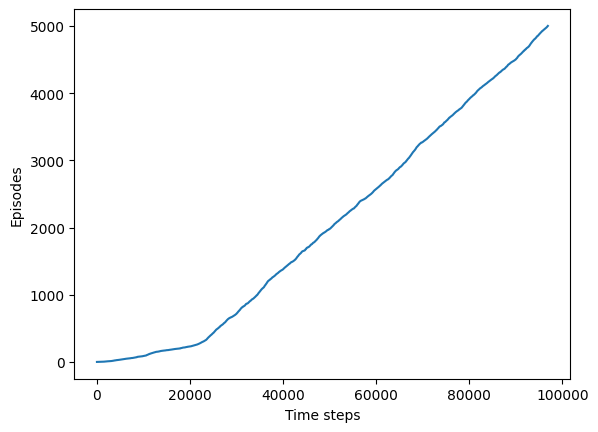

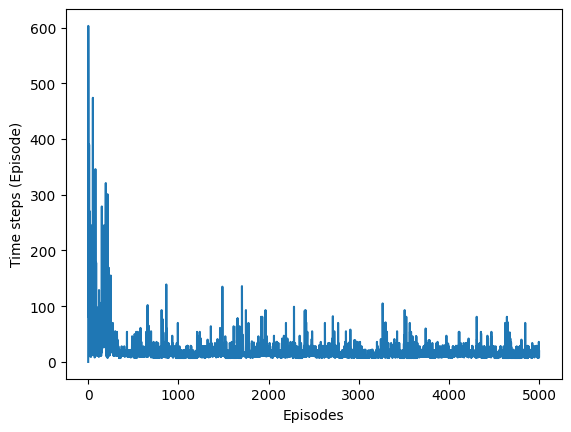

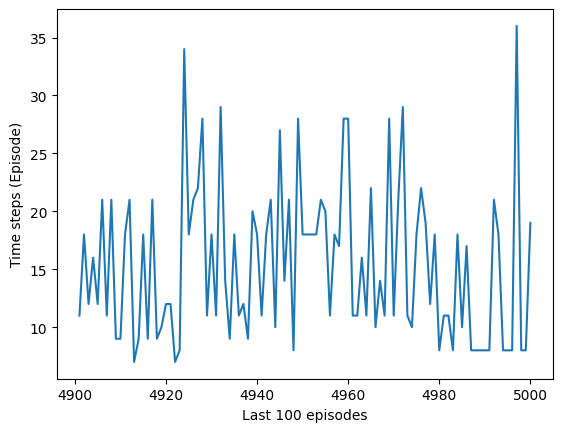

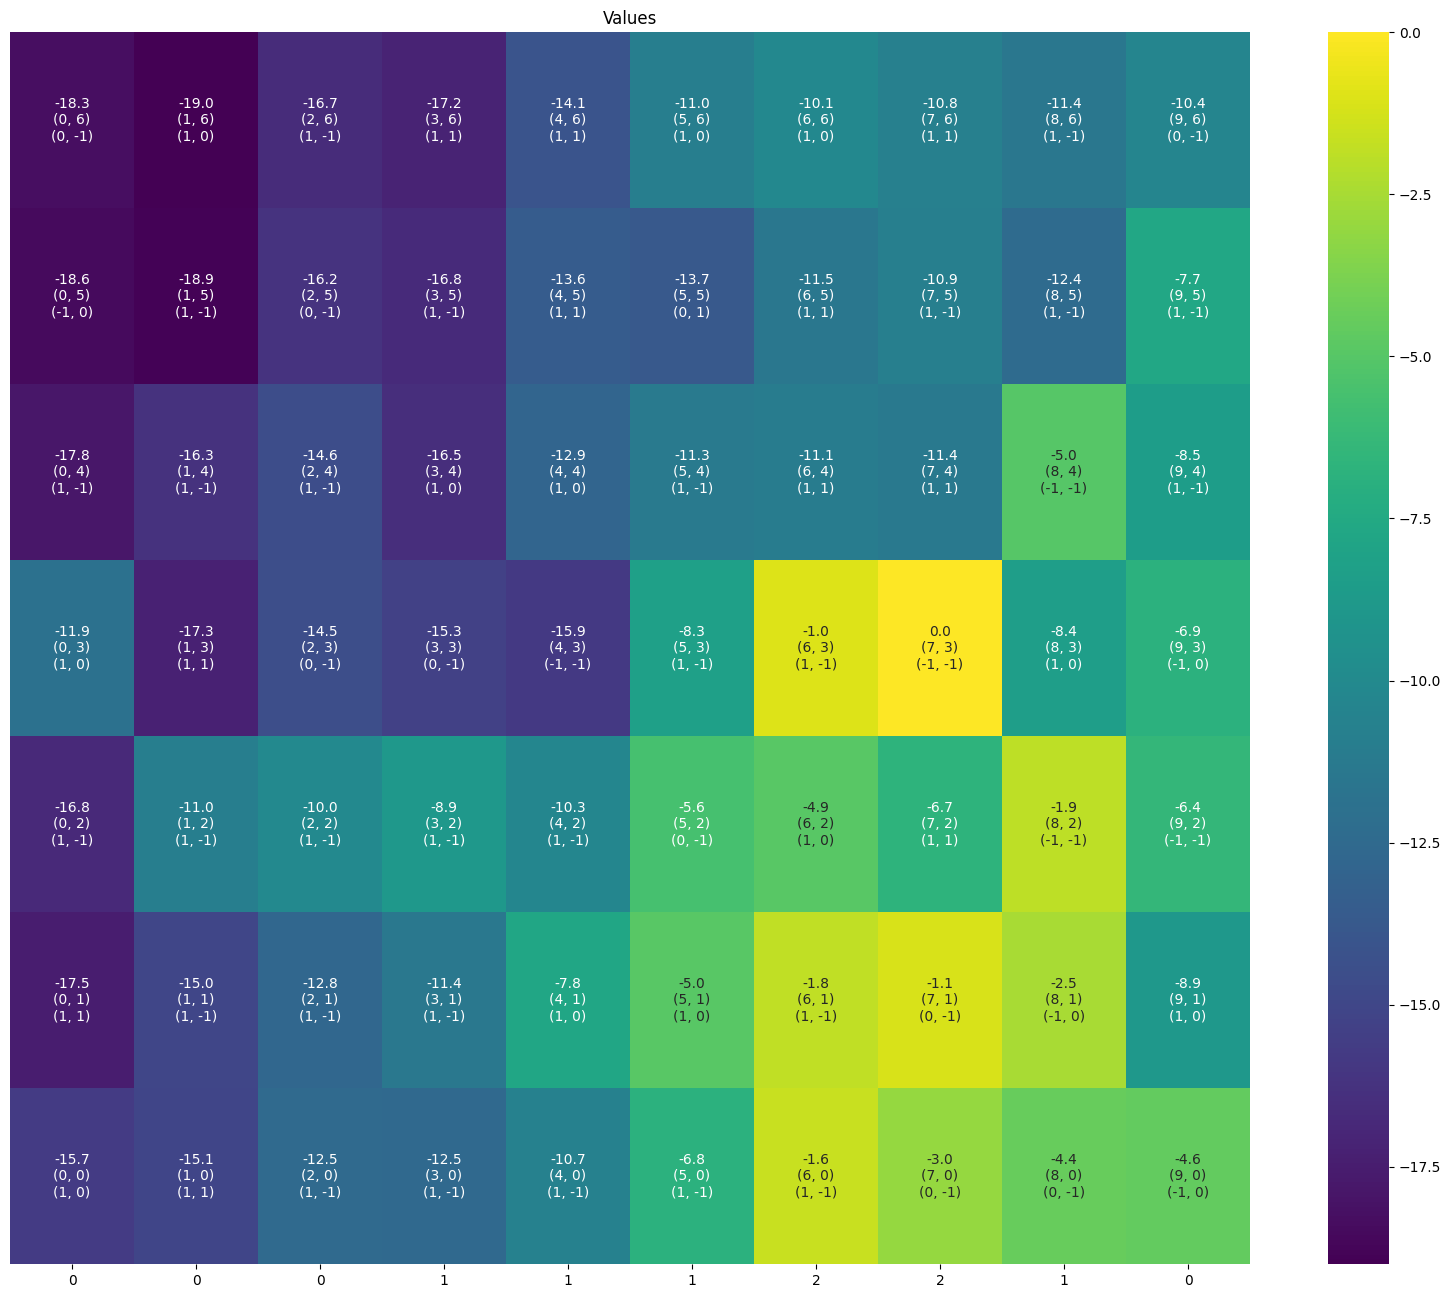

In [6]:
# Stochastic Wind
seed = 1
env = WindGridEnvBase(
    actions=[item for item in [(x, y) for x in [-1, 0, 1]  for y in [-1, 0, 1]] if item != (0, 0)],
    stochastic=True,
    max_steps=2000)
agent = TDAgentOnPolicy(env=env, seed=seed)
result = agent.train(episodes=5000, seed=seed)
print(f'Time Steps: {sum(result.steps)}')
plot(env=env, agent=agent, result=result)

## Exercise 6.11 

**Q**

Why is Q-learning considered an off-policy control method? 

**A**

Because the action-values are updated based on the optimal action that can be choosen for the next state, instead of based on the action-value given by the action choosen by the policy for the next state. It updates the action-values to conform to the optimal policy, instead of conforming them to the actual (behavior) policy used.

### Exercise 6.12 

**Q**

Suppose action selection is greedy. Is Q-learning then exactly the same algorithm as Sarsa? Will they make exactly the same action selections and weight updates?

**A**

Yes, as long as the initialization of the Q values is the same, and the action choosen in case of a draw of action-state values follow the same logic (for example, if both choose the first action with highest value). 

Considering that the action selection is greedy for the action-values, the Sarsa updates will choose the actions that give the best action-values, and the update will use the next state action-state value that have the highest value among all actions (because it is greedy and will choose the best action), which is exactly what the Q-learning algorithm does (the policy will also follow the same action because it's greedy too). 

It's important to consider that this scenario may not end up finding the optimal policy because not all actions may be considered during the episodes, even in an infinite amount of episodes / time-steps (the algorithm does not follow a soft policy).

If the Q values are initialized differently, even the same algorithm may have different updates, so this case was not considered.

### Exercise 6.13 

**Q**

What are the update equations for Double Expected Sarsa with an $\epsilon$-greedy target policy?

**A**

The update equation of the Expected Sarsa with an $\epsilon$-greedy target policy is:

\begin{align*}
Q(S_t, A_t) &\gets Q(S_t, A_t) + \alpha \left[R_{t+1} + \gamma \mathbb{E}_{\pi} [Q(S_{t+1}, A_{t+1}) | S_{t+1}] - Q(S_t, A_t) \right] \\
&\gets Q(S_t, A_t) + \alpha \left[R_{t+1} + \gamma \sum_a \pi(a | S_{t+1}) Q(S_{t+1}, a) - Q(S_t, A_t) \right]
\end{align*}

The update equations of the Double Expected Sarsa with an $\epsilon$-greedy target policy are:

\begin{align*}
Q_1(S_t, A_t) &\gets Q_1(S_t, A_t) + \alpha \left[R_{t+1} + \gamma \mathbb{E}_{\pi} [Q_2(S_{t+1}, A_{t+1}) | S_{t+1}] - Q_1(S_t, A_t) \right] \\
&\gets Q_1(S_t, A_t) + \alpha \left[R_{t+1} + \gamma \sum_a \pi(a | S_{t+1}) Q_2(S_{t+1}, a) - Q_1(S_t, A_t) \right]
\end{align*}

For an $\epsilon$-greedy policy, $\pi(a | s) = \frac{\epsilon}{|\mathcal{A}(s)|}$ for any state $s$ if $a$ is not the action that maximizes $Q(s, a)$, otherwise the probability is $\pi(\operatorname*{argmax}_a Q(s, a) | s) = 1 - \epsilon + \frac{\epsilon}{|\mathcal{A}(s)|}$.

So:

\begin{align*}
Q_1(S_t, A_t) &\gets Q_1(S_t, A_t) + \alpha \left[R_{t+1} + \gamma \sum_a \pi(a | S_{t+1}) Q_2(S_{t+1}, a) - Q_1(S_t, A_t) \right] \\
&\gets Q_1(S_t, A_t) + \alpha \left[R_{t+1} + \gamma \left(\frac{\epsilon}{|\mathcal{A}(s)|} \sum_a Q_2(S_{t+1}, a) + (1 - \epsilon) Q_2(S_{t+1}, \operatorname*{argmax}_a Q_1(S_{t+1}, a)) \right) - Q_1(S_t, A_t) \right]
\end{align*}

and the equation to update $Q_2$ is like the previous equation, but with $Q_1$ and $Q_2$ switched.

It's important to note that when updating $Q_1$, the best action $a_{max}$ is considered over $Q_1$, but the action-value to use in the update is over $Q_2$, that is, $Q_2(S_{t+1}, a_{max})$, so that the Q-values used to select the best action is different than the Q-values used to evaluate it, avoiding the maximization bias. This is analogous to the equation for the Double Q-learning.

### Exercise 6.14

**Q**

Describe how the task of Jack’s Car Rental (Example 4.2) could be reformulated in terms of afterstates. Why, in terms of this specific task, would such a reformulation be likely to speed convergence?

**A**

In the Example 4.2, Jack’s Car Rental, the state can be defined as a tuple (s1, s2) with s1 and s2 corresponding to the number of cars in the first and second locations, respectively ($0 \leq s1, s2 \leq 20$). The action that can be taken is to move until 5 cars from either location to the other, and can be defined as (m1, m2), with m1 and m2 corresponding to the number of cars moved from the first to the second location, and vice-versa, respectively ($0 \leq m1, m2 \leq 5$). 

The actual number of cars moved is actually the difference between both m1 and m2 (that is, action (3, 1)=2 actually means moving 2 cars from the first to the second location, and (1, 4)=-3 means moving 3 cars from the second location to the first). This difference can be considered as the action $a$, with $-5 \leq a \leq 5$.

The resulting number of cars after the moves is deterministic (for example, $s=(15, 13), a=3, s_{after}=(12, 16)$). It's important to take into acount that the number of cars in each location after the moves is not the next state, but an intermediate, fully deterministic state (determined only by the state at that time-step and the action taken, and not by any environmental factor). After that, non-deterministic events, like renting and returning cars, may happen, finally defining the next state and reward.

There are 21x21=441 different states and at most 11 actions for a given state (some states do not have all actions; for example, state (0, 0) has only the action 0), which will have about 441x11=4851 state-action pairs (it will be a bit less than that). Instead of doing policy evaluation and iteration over all these pairs (using action-state values, Q(s, a)), it would be more efficient to consider the afterstate after the action, $s_{after} = (s1 - a, s2 + a)$, and calculate the values of those afterstates (because after that point, the agent has no more control over the environment), which will decrease the number of values to 441, much less than the number of state-action pairs.

For example, $Q((15, 13), 3) = V_{after}((12, 16))$, but also $Q((16, 12), 4) = V_{after}((12, 16))$, and several other pairs of state-actions will give the same afterstate, and from then on the value is the same (because the reward from that point depends only on the environment).

One imediate benefit is the reduction of values (from about 4800 values to 441 values, which can make the algorithm use less memory). Another benefit is that updating an afterstate value is equivalent to updating all the corresponding action-state values. In the example above, updating $V_{after}((12, 16))$ is equivalent to updating $Q((17, 11), 5)$, $Q((16, 12), 4)$, $Q((15, 13), 3)$, $Q((14, 14), 2)$, and all other equivalent state-action pairs (there are 11 pairs). This means that a single time-step using afterstate values was equivalent to 11 time-steps using action-state values. 

In terms of this specific task, the speed of convergence would most likely be faster (probably about 10 times faster).